**Part A:** In this part we load the Titanic dataset into our program. Then we do some preprocessing on the data, like changing the string format of clasiification into numerical format, also we drop the NaN rows due to binarial behavior of this data set, we know that this action would cause less accurate data trainig on the data set but filling the NaN rows with other methods like median would cause greater damage to the training.

In [11]:
import pandas as pd

# Load the data
data = pd.read_csv("exam-scores.csv")
# Replace missing values with the mean of each column
data.fillna(data.mean(), inplace=True)

# Map the target variable to boolean values
data['target'] = data['target'].map({'+': 1, '-': 0})
data['f2'] = data['f2'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4})
data['f4'] = data['f4'].map({'N': 0, 'Y': 1})
data['f1'] = data['f1'].map({'M01': 1, 'M02': 2})
data['f5'] = data['f5'].map({'N': 0, 'Y': 1})
data['f6'] = data['f6'].map({'N': 0, 'Y': 1})
data.dropna(subset=['f3','f4','f5'],inplace=True)
# Print the preprocessed data
print(data.head())

   f1  f2  f3   f4   f5   f6  target
0   1   1  20  0.0  0.0  1.0       1
2   1   1  30  1.0  1.0  1.0       1
3   1   1  50  0.0  1.0  1.0       1
4   1   1  55  1.0  1.0  0.0       1
5   1   1  60  0.0  1.0  1.0       1


<ipython-input-11-fd0eadafcde7>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


**Part B:** In this part we split our data set.

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

**Part C:** In this part we initialize a decision tree with default parameters.

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a decision tree classifier with default parameters
clf = DecisionTreeClassifier()

**Part D:** We fit the classifier to the training data

In [14]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

**Part E:** We evaluate the performance of the model on the test data.

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy:".format(accuracy))
print("Precision: ".format(precision))
print("Recall: ".format(recall))
print("F1 score: ".format(f1))


Accuracy: 0.818
Precision: 0.900
Recall: 0.900
F1 score: 0.900


**Part F:** Visualizing the decision tree

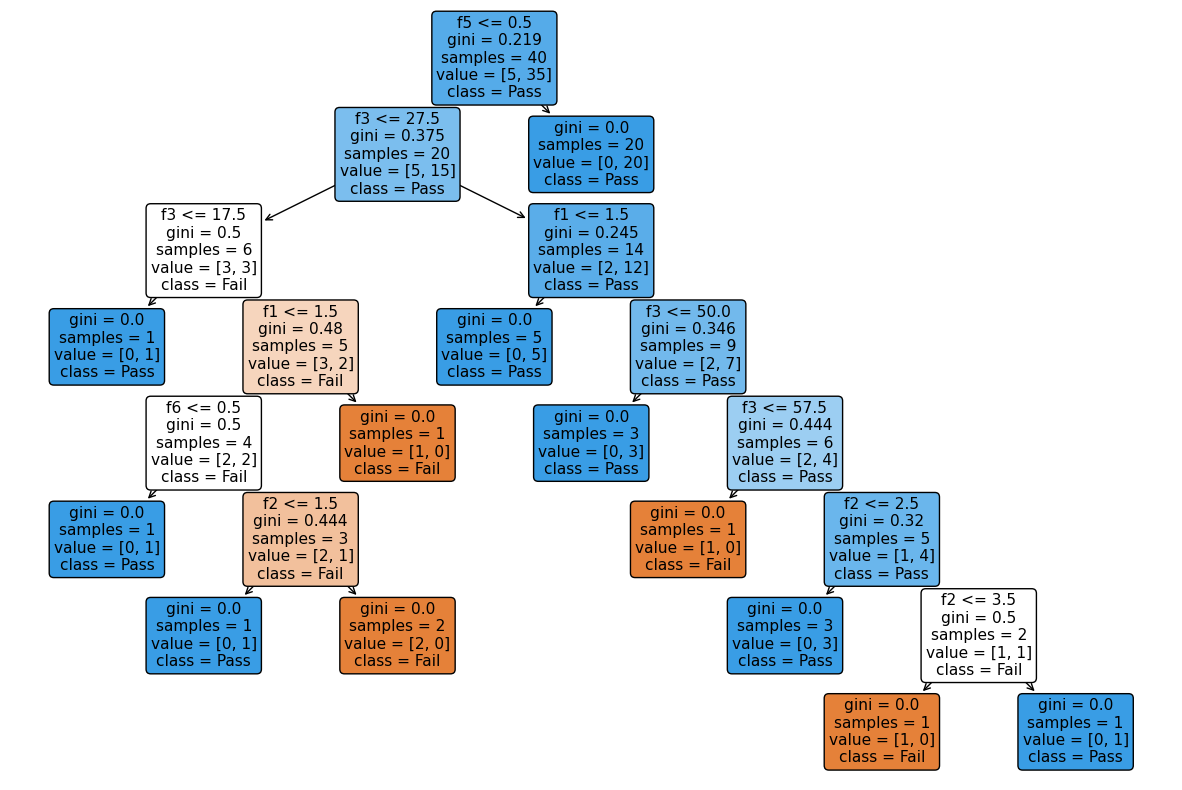

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Fail', 'Pass'], rounded=True)
plt.show()


**Part G:** we try different hyperparameter

In [32]:
clf2 = DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=42)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
f12 = f1_score(y_test, y_pred2)
print(f"Improved Accuracy: {accuracy2}")
print(f"Precision: {precision2}")
print(f"Recall: {recall2}")
print(f"F1 score:{f12}")


Improved Accuracy: 0.8181818181818182
Precision: 0.9
Recall: 0.9
F1 score:0.9


**Part H:** We use grid search to find the best

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")


Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 10}


**Part I:** We evaluate the performance of the best decision tree on the test data:

Accuracy: 0.8181818181818182
Precision: 0.9
Recall: 0.9
F1 score:0.9
Classification Report:
              precision    recall  f1-score   support

        Fail       0.00      0.00      0.00         1
        Pass       0.90      0.90      0.90        10

    accuracy                           0.82        11
   macro avg       0.45      0.45      0.45        11
weighted avg       0.82      0.82      0.82        11



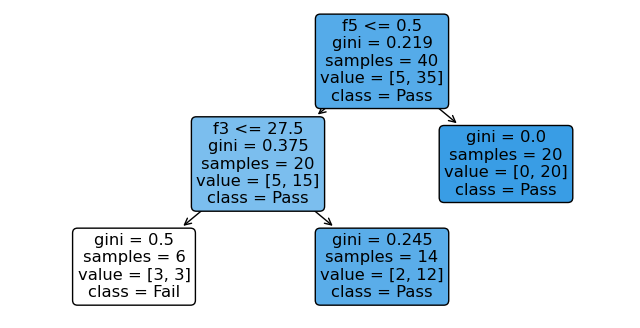

In [36]:
from sklearn.metrics import  classification_report
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)


accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
print(f"Accuracy: {accuracy_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1 score:{f1_best}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=['Fail', 'Pass']))
plt.figure(figsize=(8, 4))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['Fail', 'Pass'], rounded=True)
plt.show()
